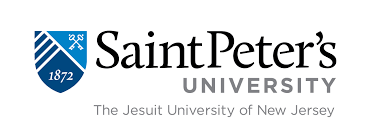

## Team Members:
<table style="width:100%">
  <tr>
    <td style="text-align:left"><font color="green"><b>First Name:</b></font></td>
    <td style="text-align:left"><b>Nandan</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="blue"><b>Last Name:</b></font></td>
    <td style="text-align:left"><b>Ankireddy</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="red"><b>Student ID:</b></font></td>
    <td style="text-align:left"><b>1024137</b></td>
  </tr>
    <tr>
    <td style="text-align:left"><font color="green"><b>First Name:</b></font></td>
    <td style="text-align:left"><b>Bhanu Prakash</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="blue"><b>Last Name:</b></font></td>
    <td style="text-align:left"><b>Chennupati</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="red"><b>Student ID:</b></font></td>
    <td style="text-align:left"><b>1021872</b></td>
  </tr>
    <tr>
    <td style="text-align:left"><font color="green"><b>First Name:</b></font></td>
    <td style="text-align:left"><b>Maha Laxmi</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="blue"><b>Last Name:</b></font></td>
    <td style="text-align:left"><b>Pratapaneni</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="red"><b>Student ID:</b></font></td>
    <td style="text-align:left"><b>######</b></td>
  </tr>
<tr>
    <td style="text-align:left"><font color="purple"><b>Class:</b></font></td>
    <td style="text-align:left"><b>DS-600: Data Mining - Capstone Project</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="orange"><b>Due Date:</b></font></td>
    <td style="text-align:left"><b>Nov 14, 2023 at 11:59PM EST.</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="brown"><b>Topic:</b></font></td>
    <td style="text-align:left"><b>This is the final draft of Jupyter Notebook</b></td>
  </tr>
  <tr>
    <td style="text-align:left"><font color="darkcyan"><b>Capstone Project#:</b></font></td>
    <td style="text-align:left"><b>Final Project</b></td>
  </tr>
</table>



## Presentation of the project:

![image](https://globaltrashsolutions.com/wp-content/uploads/2019/04/plastic-containers-for-garbage-of-different-types.png)

Our project, "SmartWaste," is a machine learning approach that revolutionizes garbage image classification in the face of growing urban waste. Our technology employs sophisticated algorithms and neural networks to precisely classify waste photos into recyclables, non-recyclables, organics, and hazardous items, thereby mitigating the inefficiencies associated with manual sorting. Our goals in automating this process are to decrease the environmental effect, increase sustainability, and improve the efficiency of trash management. As a technologically advanced solution to optimize resource allocation, reduce landfill waste, and support worldwide environmental conservation efforts, SmartWaste represents an important step towards smart city initiatives.

## Business Need:

- Rapid emergence of smart cities worldwide
- Integration of Machine Learning for data analytics
- Contribute to a cleaner, healthier urban environment

## Problem Statement
- first: Inefficient waste management in smart cities
- Second: Leads to environmental issues and higher operational costs
- Third: Hinders optimization of waste management
- Fourth: Solution: Utilize Machine Learning for data analytics

## Project Implementation: Python-Code Based 

In [100]:
## Required Libraries 
# 1- Navigateing through the operating system:
import os
from pathlib import Path

# 2- Unzip compressed set of folders - for the dataset
import zipfile

# 3- Visualization 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns

# 4- PRedictive analysis libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 5- Computer vision library
import cv2

# 6- Linear ALgebra library
import numpy as np
import pandas as pd

# 7- Progress bar library
from tqdm import tqdm

# 8- Exporting the best model as a pickle file 
import pickle

# 9- Streamlit App
import streamlit as st

### 1. Acquiring the data 

In [6]:
# We will list the contents of the actual dataset directory
dataset_dir = '../dataset'
dataset_contents = os.listdir(dataset_dir)
dataset_contents[:10]

['cardboard',
 'glass',
 'Hazardous',
 'Medical waste',
 'metal',
 'paper',
 'plastic',
 'trash']

In [7]:
# Prepare a dictionary to hold the categories and their file counts
category_file_counts = {}

# Iterate over each category directory and count the number of files
for category in dataset_contents:
    # Skip system files like .DS_Store
    if not category.startswith('.'):
        category_path = os.path.join(dataset_dir, category)
        # Count the number of image files, assuming they do not start with '.'
        image_files = [f for f in os.listdir(category_path) if not f.startswith('.')]
        category_file_counts[category] = len(image_files)

category_file_counts

{'cardboard': 403,
 'glass': 501,
 'Hazardous': 350,
 'Medical waste': 300,
 'metal': 410,
 'paper': 594,
 'plastic': 482,
 'trash': 137}

### 2. Exploratory Data Analysis (EDA)
![image](https://datos.gob.es/sites/default/files/u322/grafico.jpg)

#### 2-1) Descriptive analysis

The idea here is to showcase the stats of the different categories we have within the imagery dataset

In [12]:
## Creating a pandas dataframe to showcase the stats
descriptive_analysis = pd.DataFrame(list(category_file_counts.items()), columns=['WasteCategory','Count'])

## Showcase the stats
descriptive_analysis

,WasteCategory,Count
0,cardboard,403
1,glass,501
2,Hazardous,350
3,Medical waste,300
4,metal,410
5,paper,594
6,plastic,482
7,trash,137


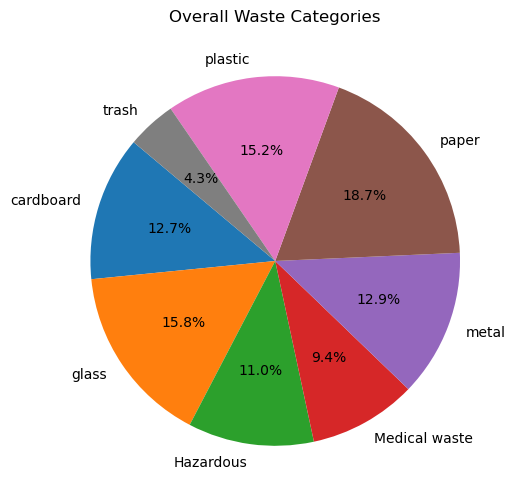

In [13]:
## Showcasing the description above into a piechart
plt.figure(figsize=(8,6))
plt.pie(descriptive_analysis['Count'], labels=descriptive_analysis['WasteCategory'], autopct='%1.1f%%', startangle=140)
plt.title('Overall Waste Categories')
plt.show()

#### 2-2) Misceleanous Statistical Analysis 

This exhibit showcases the distribution of images across trash types

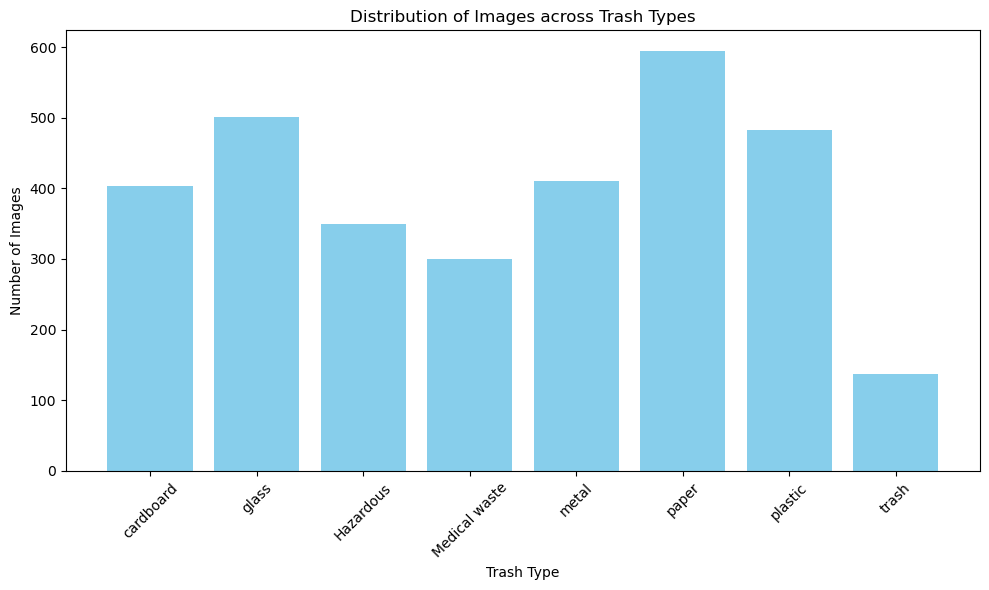

In [14]:
categories = list(category_file_counts.keys())
file_counts = list(category_file_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(categories, file_counts, color='skyblue')
plt.title('Distribution of Images across Trash Types')
plt.xlabel('Trash Type')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2-3) Detecting and Diving deeper into the Imagery Dimention Analysis 

This step aims to diving deeper into the image baseline, and showcase the dimension per images being ingested in dataset historical repository

In [25]:
## Creating a dictionary of categories and their respective dimensions 
dimensions = {'cardboard':[], 'glass':[], 'Hazardous':[], 'Medical waste':[], 'metal':[], 'paper':[], 'plastic':[], 'trash':[]}

for category in categories:
    for image_file in os.listdir(os.path.join(dataset_dir, category)):
        with Image.open(os.path.join(dataset_dir, category, image_file)) as img:
            dimensions[category].append(img.size)

In [32]:
# defining numpy seed
np.random.seed(0)

## Converting the dimension dictionary into a pandas dataframe
dimensions_df = pd.DataFrame(list(dimensions.items()), columns=['WasteCategory','Dimensionality'])
dimensions_df

,WasteCategory,Dimensionality
0,cardboard,"[(512, 384), (512, 384), (512, 384), (512, 384..."
1,glass,"[(512, 384), (512, 384), (512, 384), (512, 384..."
2,Hazardous,"[(600, 600), (1280, 1811), (600, 450), (690, 4..."
3,Medical waste,"[(100, 100), (225, 225), (225, 225), (225, 225..."
4,metal,"[(512, 384), (512, 384), (512, 384), (512, 384..."
5,paper,"[(512, 384), (512, 384), (512, 384), (512, 384..."
6,plastic,"[(512, 384), (512, 384), (512, 384), (512, 384..."
7,trash,"[(512, 384), (512, 384), (512, 384), (512, 384..."


In [35]:
## Converting all the dimensions into a suitable format for plotting
widths= []
heights = []
categories_dimensionality = []

## populate the lists above
for category, dims in dimensions.items():
    for dim in dims:
        widths.append(dim[0])
        heights.append(dim[1])
        categories_dimensionality.append(category)

## Reviewed dataframe of dimentionality
dimensions_df =  pd.DataFrame({'WasteCategory':categories_dimensionality, 'Width': widths, 'Height':heights})
dimensions_df

,WasteCategory,Width,Height
0,cardboard,512,384
1,cardboard,512,384
2,cardboard,512,384
3,cardboard,512,384
4,cardboard,512,384
...,...,...,...
3172,trash,512,384
3173,trash,512,384
3174,trash,512,384
3175,trash,512,384


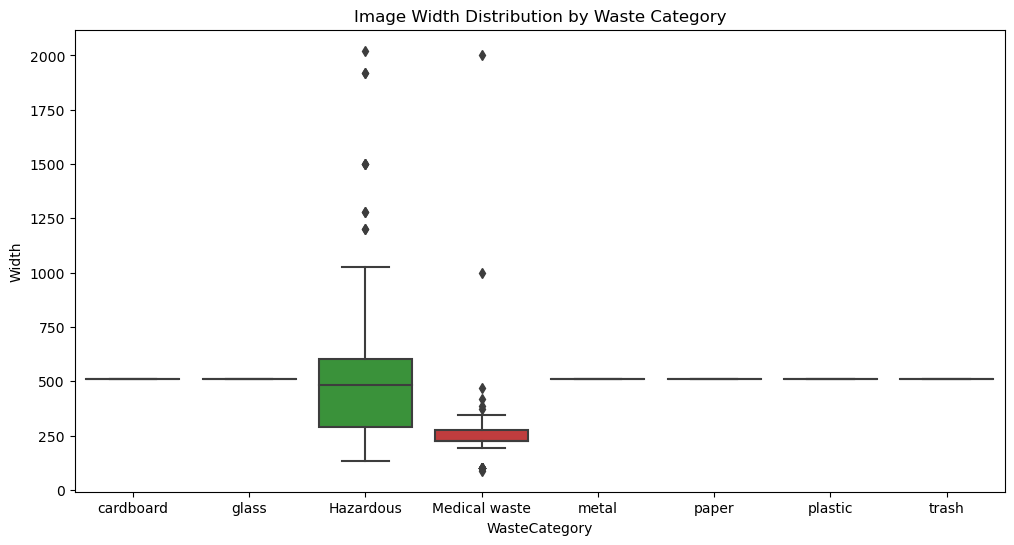

In [36]:
## Plotting Width Distribution
plt.figure(figsize=(12,6))
sns.boxplot(x='WasteCategory', y='Width', data= dimensions_df)
plt.title("Image Width Distribution by Waste Category")
plt.show()

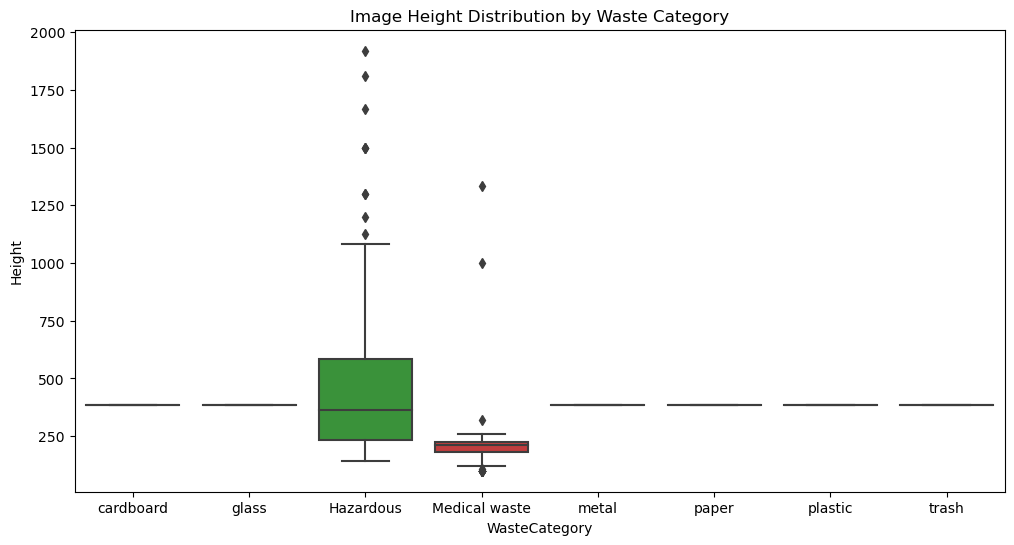

In [37]:
## Plotting Height Distribution
plt.figure(figsize=(12,6))
sns.boxplot(x='WasteCategory', y='Height', data= dimensions_df)
plt.title("Image Height Distribution by Waste Category")
plt.show()

#### 2-4) Identifying the distribution of Pixels Color Distributions

The aim of this analysis is to study the RGB distribution of images' colors across the dataset

In [42]:
## Creating a disctionary of colors distributions 
average_colors = {'cardboard':np.zeros(3), 'glass':np.zeros(3), 'Hazardous':np.zeros(3), 'Medical waste':np.zeros(3), 'metal':np.zeros(3), 'paper':np.zeros(3), 'plastic':np.zeros(3), 'trash':np.zeros(3)}

## navigating through categories to extract the the average RGB data:
for category in categories:
    total_images = 0
    for image_file in os.listdir(os.path.join(dataset_dir, category)):
        with Image.open(os.path.join(dataset_dir, category, image_file)) as img:
            ## Convert to RGB if image is RGBA
            if img.mode == 'RGBA':
                img = img.convert('RGB')
            average_colors[category] += np.mean(np.array(img), axis=(0,1))
            total_images +=1
    if total_images >0:
        average_colors[category] /=total_images


In [43]:
average_colors

{'cardboard': array([170.07921003, 148.85685703, 127.93230565]),
 'glass': array([176.37511461, 170.51822632, 163.09971767]),
 'Hazardous': array([162.27865642, 159.13686848, 154.79640618]),
 'Medical waste': array([198.40553661, 215.1235205 , 222.59863606]),
 'metal': array([164.82942572, 157.00536939, 151.89813633]),
 'paper': array([172.18193413, 164.55001602, 155.43272388]),
 'plastic': array([171.0856484 , 170.09175153, 168.98055373]),
 'trash': array([178.80370348, 166.11262716, 149.04843025])}

In [45]:
## Visualize the AVG (RGB)
# Converting the RGB format into a suitable format for plotting:
average_colors_df = pd.DataFrame(average_colors, index=['Red','Green','Blue']).T
average_colors_df

,Red,Green,Blue
cardboard,170.079210,148.856857,127.932306
glass,176.375115,170.518226,163.099718
Hazardous,162.278656,159.136868,154.796406
Medical waste,198.405537,215.123520,222.598636
metal,164.829426,157.005369,151.898136
paper,172.181934,164.550016,155.432724
plastic,171.085648,170.091752,168.980554
trash,178.803703,166.112627,149.048430


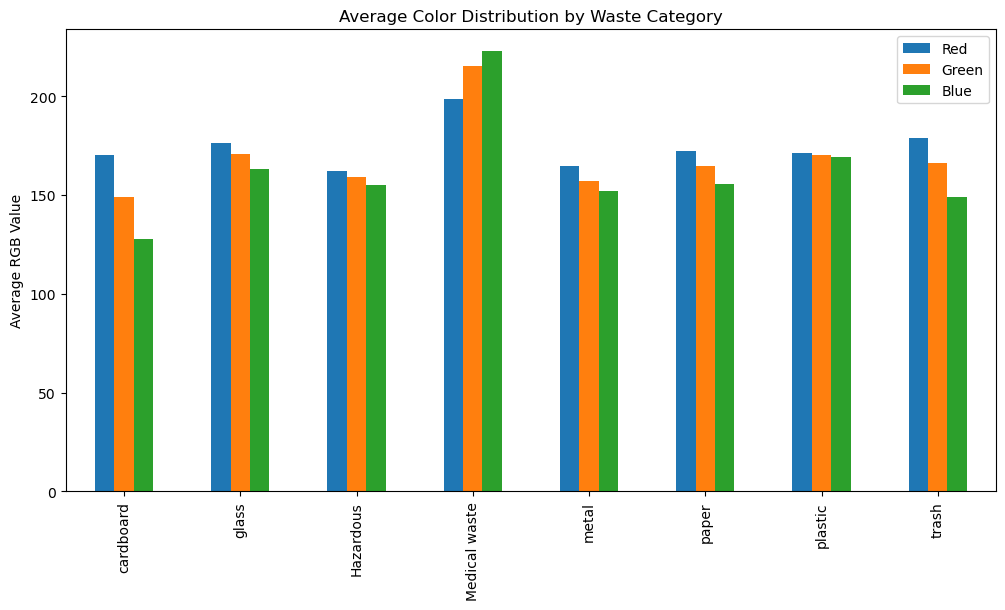

In [46]:
##Plotting the Average Colors Dataframe 
average_colors_df.plot(kind='bar', figsize=(12,6))
plt.title('Average Color Distribution by Waste Category')
plt.ylabel('Average RGB Value')
plt.show()

### 3. Prescriptive Analysis:
![image](https://www.arcweb.com/sites/default/files/Images/blog-images-3/1%20analytics%2010%20Prescriptive%20%2B%20Optimization.JPG)

In this step, we are exploring the imagery if it is compliant to the earliest classification 

#### 3.1) Analyzing the following category: "PAPER"

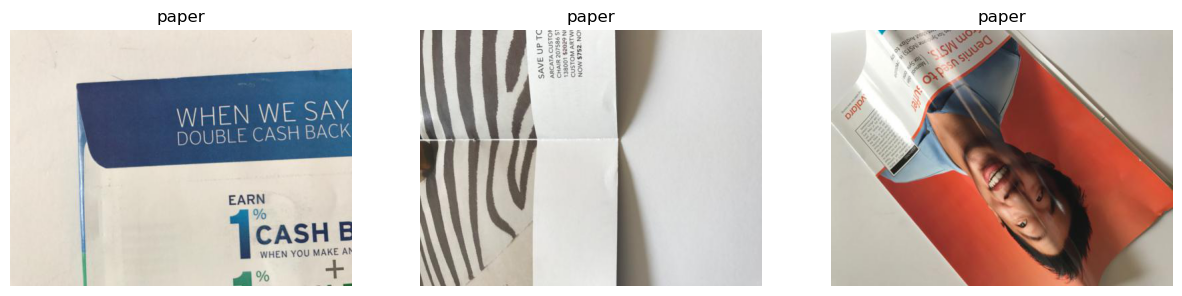

In [47]:
# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(images):
        img = mpimg.imread(image_path)
        plt.subplot(1, len(images), i+1)
        plt.title(titles[i])
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Path to one of the trash type directories
sample_dir_path = Path(dataset_dir) / 'paper'

# Get paths of the first few images in the directory
sample_images_paths = list(sample_dir_path.glob('*.jpg'))[:3]

# Display the images with their labels
display_images(sample_images_paths, ['paper']*len(sample_images_paths))


#### 3.2) Analyzing the following category: "METAL"

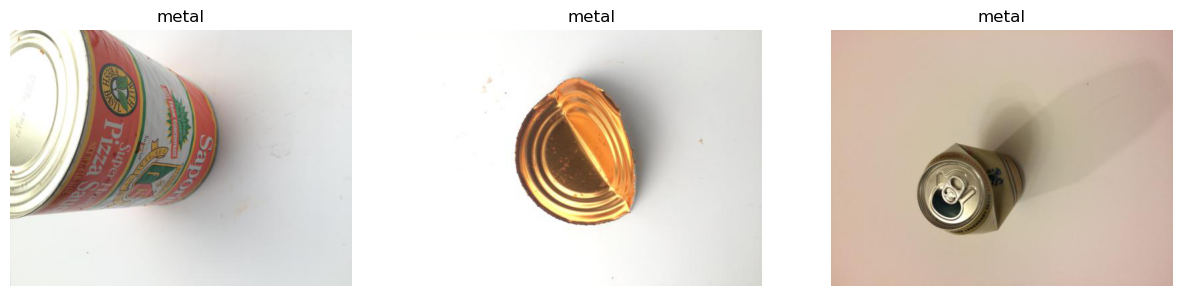

In [6]:
# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(images):
        img = mpimg.imread(image_path)
        plt.subplot(1, len(images), i+1)
        plt.title(titles[i])
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Path to one of the trash type directories
sample_dir_path = Path(dataset_dir) / 'metal'

# Get paths of the first few images in the directory
sample_images_paths = list(sample_dir_path.glob('*.jpg'))[:3]

# Display the images with their labels
display_images(sample_images_paths, ['metal']*len(sample_images_paths))


#### 3.3) Analyzing the following category: "PLASTIC"

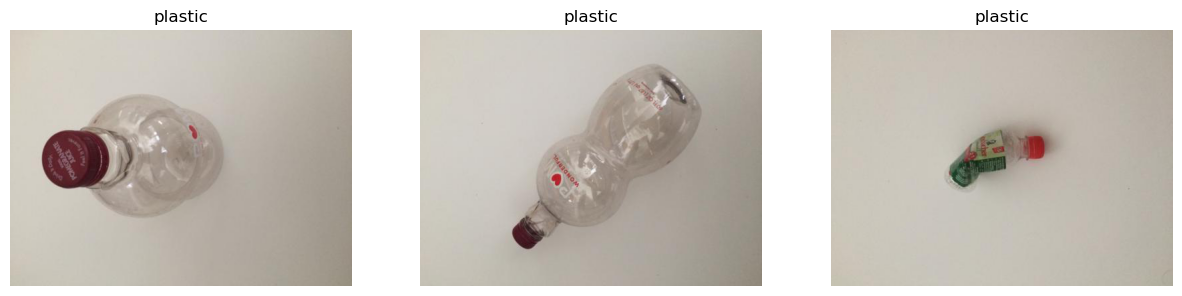

In [7]:
# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(images):
        img = mpimg.imread(image_path)
        plt.subplot(1, len(images), i+1)
        plt.title(titles[i])
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Path to one of the trash type directories
sample_dir_path = Path(dataset_dir) / 'plastic'

# Get paths of the first few images in the directory
sample_images_paths = list(sample_dir_path.glob('*.jpg'))[:3]

# Display the images with their labels
display_images(sample_images_paths, ['plastic']*len(sample_images_paths))


#### 3.4) Analyzing the Pixel Intensity and its related Frequency for allk ingested images

In [50]:
# Function to compute a color histogram for an image
def compute_histogram(image_path, bins=(8, 8, 8)):
    # Read the image
    image = cv2.imread(image_path)
    # Convert it from BGR to RGB so we can plot it with matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Compute the histogram
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    # Normalize the histogram
    hist = cv2.normalize(hist, hist).flatten()
    return hist

In [63]:
## Showcasing hostopgram of the ingested data 
histogram = []
for category in categories:
    for image_file in os.listdir(os.path.join(dataset_dir, category)):
        with Image.open(os.path.join(dataset_dir, category, image_file)) as img:
            hist = compute_histogram(str(dataset_dir)+'/'+str(category)+'/'+image_file, bins=(8, 8, 8))
            histogram.append(hist)

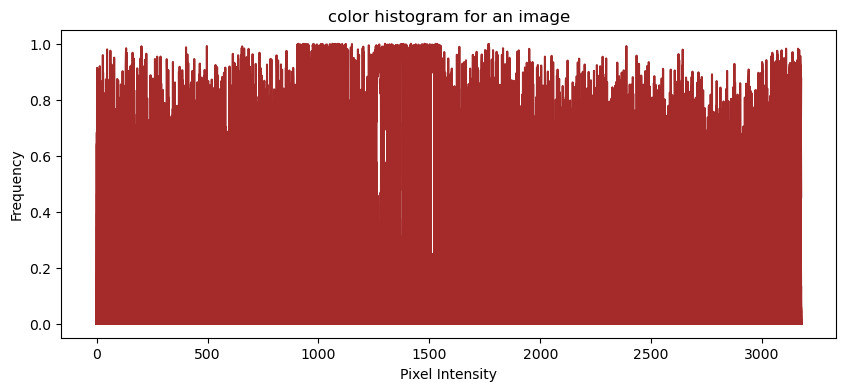

In [67]:
## Plot the histogram above 
plt.figure(figsize=(10,4))
plt.plot(histogram, color='brown')
plt.title('color histogram for an image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

### 4. Predictive Analysis
![image](https://images.surferseo.art/994e2b0e-2c7c-466f-afa0-9a4e753e2ac7.png)

#### 4.1) Data Splitting: Training Set & Testing Set 

In [69]:
# Prepare the dataset
def prepare_dataset(dataset_directory):
    labels = []
    features = []
    
    # Loop over the folders
    for folder in tqdm(os.listdir(dataset_dir)):
        if folder.startswith('.'):
            continue  
        folder_path = os.path.join(dataset_dir, folder)
        if not os.path.isdir(folder_path):
            continue  
        for image_name in os.listdir(folder_path):
            if image_name.startswith('.'):
                continue  
            image_path = os.path.join(folder_path, image_name)
            hist = compute_histogram(image_path)
            features.append(hist)
            labels.append(folder)
            
    return np.array(features), np.array(labels)

# Extract features and labels
features, labels = prepare_dataset(dataset_dir)

100%|██████████| 8/8 [01:12<00:00,  9.09s/it]


In [70]:
print("These are the features of our Dataset: \n", features)

These are the features of our Dataset: 
 [[6.9142273e-04 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  8.2379323e-05 0.0000000e+00]
 [3.7105032e-03 7.1355826e-05 0.0000000e+00 ... 0.0000000e+00
  3.2823682e-03 8.9670494e-03]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  5.0203893e-02 4.0487248e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.7380533e-05
  2.1561771e-04 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  9.6077019e-06 0.0000000e+00]]


In [71]:
print("These are the labels of our Dataset: \n", labels)

These are the labels of our Dataset: 
 ['cardboard' 'cardboard' 'cardboard' ... 'trash' 'trash' 'trash']


#### 4.2) A look at the data splitting:

In [72]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [77]:
## Here sharing insights about the dataset
## Gather insights 
insights = {
    "Dataset": ["Training", "Testing"],
    "Num Samples": [X_train.shape[0], X_test[0]],
    "Mean Feature Value": [X_train.mean(), X_test.mean()],
    "Std Feature Value": [X_train.std(), X_test.std()]
}

## Creating a DataFrame 
df_insights = pd.DataFrame(insights)
df_insights

,Dataset,Num Samples,Mean Feature Value,Std Feature Value
0,Training,2541,0.005200,0.043887
1,Testing,"[0.0021483013, 0.00016692882, 0.0, 0.0, 0.0, 0...",0.005305,0.043875


#### 4.3) MODEL I: StandardScaler &SVM

In [78]:
# Standardize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
model_SVM = svm.SVC(kernel='linear', probability=True, random_state=42)
model_SVM.fit(X_train, y_train)

# Predictions
y_pred = model_SVM.predict(X_test)

# Calculate the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [79]:
print("✅ The following is the SVM model accuracy: \n",accuracy)

✅ The following is the SVM model accuracy: 
 0.6179245283018868


In [81]:
print(classification_rep)

               precision    recall  f1-score   support

    Hazardous       0.41      0.50      0.45        62
Medical waste       0.77      0.69      0.73        58
    cardboard       0.80      0.72      0.76        97
        glass       0.57      0.65      0.61       108
        metal       0.56      0.47      0.51        73
        paper       0.60      0.74      0.66       102
      plastic       0.72      0.61      0.66       107
        trash       0.35      0.28      0.31        29

     accuracy                           0.62       636
    macro avg       0.60      0.58      0.59       636
 weighted avg       0.63      0.62      0.62       636



#### 4.4) MODEL II: Random Forest Classifier

In [82]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions using the Random Forest model
y_rf_pred = rf_model.predict(X_test)

# Calculate the accuracy and classification report for the Random Forest model
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_classification_rep = classification_report(y_test, y_rf_pred)

In [83]:
print("✅ The following is the Random Forest model accuracy: \n", rf_accuracy)

✅ The following is the Random Forest model accuracy: 
 0.7437106918238994


In [84]:
print(rf_classification_rep)

               precision    recall  f1-score   support

    Hazardous       0.63      0.61      0.62        62
Medical waste       0.89      0.84      0.87        58
    cardboard       0.88      0.85      0.86        97
        glass       0.73      0.77      0.75       108
        metal       0.69      0.66      0.67        73
        paper       0.62      0.88      0.73       102
      plastic       0.81      0.63      0.71       107
        trash       1.00      0.55      0.71        29

     accuracy                           0.74       636
    macro avg       0.78      0.72      0.74       636
 weighted avg       0.76      0.74      0.74       636



#### 4.4) MODEL III: Logistic Regression

In [85]:
# Train a Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predictions using the Logistic Regression model
y_logreg_pred = logreg_model.predict(X_test)

# Calculate the accuracy and classification report for the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, y_logreg_pred)
logreg_classification_rep = classification_report(y_test, y_logreg_pred)

In [86]:
print("✅ The following is the Logestic Regression model accuracy: \n",logreg_accuracy)

✅ The following is the Logestic Regression model accuracy: 
 0.6147798742138365


In [87]:
print(logreg_classification_rep)

               precision    recall  f1-score   support

    Hazardous       0.52      0.44      0.47        62
Medical waste       0.71      0.69      0.70        58
    cardboard       0.85      0.65      0.74        97
        glass       0.55      0.63      0.59       108
        metal       0.56      0.49      0.53        73
        paper       0.59      0.72      0.65       102
      plastic       0.63      0.68      0.65       107
        trash       0.39      0.38      0.39        29

     accuracy                           0.61       636
    macro avg       0.60      0.58      0.59       636
 weighted avg       0.62      0.61      0.61       636



#### 4.5) MODEL IV: K-Nearest Neighbor (KNN)

In [88]:
# Train a k-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions using the k-Nearest Neighbors model
y_knn_pred = knn_model.predict(X_test)

# Calculate the accuracy and classification report for the k-Nearest Neighbors model
knn_accuracy = accuracy_score(y_test, y_knn_pred)
knn_classification_rep = classification_report(y_test, y_knn_pred)

In [89]:
print("✅ The following is the K-Nearest Neighbor (KNN) model accuracy: \n", knn_accuracy)

✅ The following is the K-Nearest Neighbor (KNN) model accuracy: 
 0.6572327044025157


In [90]:
print(knn_classification_rep)

               precision    recall  f1-score   support

    Hazardous       0.51      0.34      0.41        62
Medical waste       0.72      0.72      0.72        58
    cardboard       0.82      0.77      0.79        97
        glass       0.61      0.79      0.69       108
        metal       0.56      0.53      0.55        73
        paper       0.65      0.80      0.72       102
      plastic       0.69      0.61      0.65       107
        trash       0.64      0.31      0.42        29

     accuracy                           0.66       636
    macro avg       0.65      0.61      0.62       636
 weighted avg       0.66      0.66      0.65       636



#### 4.6) Compatrative Study of all the implemented Models

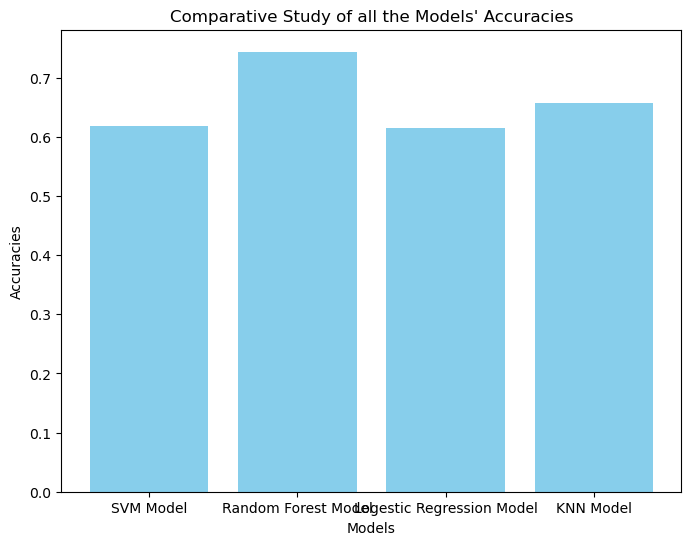

In [93]:
## Creating a dataframe of all the models accuracies
accuracies = {
    "SVM Model":accuracy,
    "Random Forest Model":rf_accuracy,
    "Logestic Regression Model": logreg_accuracy,
    "KNN Model": knn_accuracy
}
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=["Model", "Accuracy"])

# Plotting the results 
plt.figure(figsize=(8,6))
plt.bar(accuracy_df["Model"], accuracy_df["Accuracy"], color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Comparative Study of all the Models' Accuracies")
plt.show()

**Conclusion**

- From the latter comparative study, we are going to deploy *RandomForest* as being the most accurate model for out dataset.

### 5. Project Deployment
![image](https://blog.streamlit.io/content/images/2022/08/E55BB258-DA30-4262-BDAA-7B2C6A0E5E15.jpeg)

#### 5.1) Exporting the best model as a pickle file

In [98]:
## Exporting the Random Forest as a pickle model
with open('../deployed_model/random_forest.pkl', 'wb') as file:
    pickle.dump(rf_model,file)

#### 5.2) Implementing Streamlit App

In [102]:
%%writefile ../StreamLit_App/myapp.py
import streamlit as st
from sklearn import svm
from sklearn import datasets
import pickle

clf = svm.SVC()
X, y = datasets.load_iris(return_X_y=True)
clf.fit(X, y)


st.download_button(
    "Download Model",
    data=pickle.dumps(clf),
    file_name="model.pkl",
)

uploaded_file = st.file_uploader("Upload Model")

if uploaded_file is not None:
    clf2 = pickle.loads(uploaded_file.read())
    st.write("Model loaded")
    st.write(clf2)
    st.write("Predicting...")
    st.write(clf2.predict(X[0:1]))
    st.write(y[0])
    st.write("Done!")

Writing ../StreamLit_App/myapp.py


#### 5.3) Executing the Streamlit App

In [ ]:
!streamlit run ../StreamLit_App/myapp.py

In [29]:
%%writefile ../StreamLit_App/myapp.py
#!/usr/bin/env python
# coding: utf-8

"""
Description
This is a streamlit app to showcase the results of training 4 ML models to help triage waste/trash in a given smart city.
The project aims to fullfiull the following action items:
- Rapid emergence of smart cities worldwide
- Integration of Machine Learning for data analytics
- Contribute to a cleaner, healthier urban environment

Purpose
- first: Inefficient waste management in smart cities
- Second: Leads to environmental issues and higher operational costs
- Third: Hinders optimization of waste management
- Fourth: Solution: Utilize Machine Learning for data analytics

"""
# Core Pkgs
import streamlit as st
#from streamlit import components
import streamlit.components.v1 as components
import os
from PIL import Image 
import warnings
warnings.filterwarnings("ignore")

#Visualization
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.use("Agg")
import seaborn as sns

#from dataset_milestone1 import datasets: Add all the different diseases 
import pandas as pd
## Required Libraries 
# 1- Navigateing through the operating system:
import os
from pathlib import Path

# 2- Unzip compressed set of folders - for the dataset
import zipfile

# 3- Visualization 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns

# 4- PRedictive analysis libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 5- Computer vision library
import cv2

# 6- Linear ALgebra library
import numpy as np
import pandas as pd

# 7- Progress bar library
from tqdm import tqdm

# 8- Exporting the best model as a pickle file 
import pickle

# 9- Streamlit App
import streamlit as st

#=================================
## Data Acquisition
dataset_dir = '../dataset'
dataset_contents = os.listdir(dataset_dir)
dataset_contents[:10]

placeholder = '''
In an attempt to build an AI-ready workforce, Microsoft announced Intelligent Cloud Hub which has been launched to empower the next generation of students with AI-ready skills. Envisioned as a three-year collaborative program, Intelligent Cloud Hub will support around 100 institutions with AI infrastructure, course content and curriculum, developer support, development tools and give students access to cloud and AI services. As part of the program, the Redmond giant which wants to expand its reach and is planning to build a strong developer ecosystem in India with the program will set up the core AI infrastructure and IoT Hub for the selected campuses. The company will provide AI development tools and Azure AI services such as Microsoft Cognitive Services, Bot Services and Azure Machine Learning.According to Manish Prakash, Country General Manager-PS, Health and Education, Microsoft India, said, "With AI being the defining technology of our time, it is transforming lives and industry and the jobs of tomorrow will require a different skillset. This will require more collaborations and training and working with AI. That’s why it has become more critical than ever for educational institutions to integrate new cloud and AI technologies. The program is an attempt to ramp up the institutional set-up and build capabilities among the educators to educate the workforce of tomorrow." The program aims to build up the cognitive skills and in-depth understanding of developing intelligent cloud connected solutions for applications across industry. Earlier in April this year, the company announced Microsoft Professional Program In AI as a learning track open to the public. The program was developed to provide job ready skills to programmers who wanted to hone their skills in AI and data science with a series of online courses which featured hands-on labs and expert instructors as well. This program also included developer-focused AI school that provided a bunch of assets to help build AI skills.

'''

#==================================
# Prepare a dictionary to hold the categories and their file counts
category_file_counts = {}

# Iterate over each category directory and count the number of files
for category in dataset_contents:
    # Skip system files like .DS_Store
    if not category.startswith('.'):
        category_path = os.path.join(dataset_dir, category)
        # Count the number of image files, assuming they do not start with '.'
        image_files = [f for f in os.listdir(category_path) if not f.startswith('.')]
        category_file_counts[category] = len(image_files)

#category_file_counts

#==================================
## Creating a pandas dataframe to showcase the stats
descriptive_analysis = pd.DataFrame(list(category_file_counts.items()), columns=['WasteCategory','Count'])
categories = list(category_file_counts.keys())
file_counts = list(category_file_counts.values())
## Showcase the stats
#descriptive_analysis
#==================================
def Waste_Cat():
    ## Showcasing the description above into a piechart
    plt.figure(figsize=(8,6))
    plt.pie(descriptive_analysis['Count'], labels=descriptive_analysis['WasteCategory'], autopct='%1.1f%%', startangle=140)
    plt.title('Overall Waste Categories')
    plt.show()
#==================================
## Creating a dictionary of categories and their respective dimensions 
dimensions = {'cardboard':[], 'glass':[], 'Hazardous':[], 'Medical waste':[], 'metal':[], 'paper':[], 'plastic':[], 'trash':[]}

for category in categories:
    for image_file in os.listdir(os.path.join(dataset_dir, category)):
        with Image.open(os.path.join(dataset_dir, category, image_file)) as img:
            dimensions[category].append(img.size)
            
# defining numpy seed
np.random.seed(0)

## Converting the dimension dictionary into a pandas dataframe
dimensions_df = pd.DataFrame(list(dimensions.items()), columns=['WasteCategory','Dimensionality'])
#dimensions_df


#==================================
## Converting all the dimensions into a suitable format for plotting
widths= []
heights = []
categories_dimensionality = []

## populate the lists above
for category, dims in dimensions.items():
    for dim in dims:
        widths.append(dim[0])
        heights.append(dim[1])
        categories_dimensionality.append(category)

## Reviewed dataframe of dimentionality
dimensions_df_2 =  pd.DataFrame({'WasteCategory':categories_dimensionality, 'Width': widths, 'Height':heights})


            
#==================================            
def Distr_Of_Img():
    plt.figure(figsize=(10, 6))
    plt.bar(categories, file_counts, color='skyblue')
    plt.title('Distribution of Images across Trash Types')
    plt.xlabel('Trash Type')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    #==================================
def Img_Width_Distr():
    ## Plotting Width Distribution
    plt.figure(figsize=(12,6))
    sns.boxplot(x='WasteCategory', y='Width', data= dimensions_df_2)
    plt.title("Image Width Distribution by Waste Category")
    plt.show()
#==================================
def Img_Height_Distr():
    ## Plotting Height Distribution
    plt.figure(figsize=(12,6))
    sns.boxplot(x='WasteCategory', y='Height', data= dimensions_df_2)
    plt.title("Image Height Distribution by Waste Category")
    plt.show()
#==================================
## Creating a disctionary of colors distributions 
average_colors = {'cardboard':np.zeros(3), 'glass':np.zeros(3), 'Hazardous':np.zeros(3), 'Medical waste':np.zeros(3), 'metal':np.zeros(3), 'paper':np.zeros(3), 'plastic':np.zeros(3), 'trash':np.zeros(3)}

## navigating through categories to extract the the average RGB data:
for category in categories:
    total_images = 0
    for image_file in os.listdir(os.path.join(dataset_dir, category)):
        with Image.open(os.path.join(dataset_dir, category, image_file)) as img:
            ## Convert to RGB if image is RGBA
            if img.mode == 'RGBA':
                img = img.convert('RGB')
            average_colors[category] += np.mean(np.array(img), axis=(0,1))
            total_images +=1
    if total_images >0:
        average_colors[category] /=total_images

## Visualize the AVG (RGB)
# Converting the RGB format into a suitable format for plotting:
average_colors_df = pd.DataFrame(average_colors, index=['Red','Green','Blue']).T
average_colors_df
#==================================
def Avg_Clr_Dist():
    ##Plotting the Average Colors Dataframe 
    average_colors_df.plot(kind='bar', figsize=(12,6))
    plt.title('Average Color Distribution by Waste Category')
    plt.ylabel('Average RGB Value')
    plt.show()

# Predictive Analysis
#==================================
# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(images):
        img = mpimg.imread(image_path)
        plt.subplot(1, len(images), i+1)
        plt.title(titles[i])
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Display the images with their labels
#display_images(sample_images_paths, ['paper']*len(sample_images_paths))

#==================================
from PIL import Image
def display_images_on_streamlit(images, titles):
    for i, image_path in enumerate(images):
        image=Image.open(image_path)
        st.image(image, caption=titles[i], use_column_width=True)

#==================================


#==================================

#Starting from the top
st.markdown("# Smart City Waste Management App™ v1.0")
st.markdown("By Bhanu Prakash & Nandan Ankireddy & Maha Laxmi")
original_title = '<p style="color:Orange; font-size: 30px;">Smart Cities Waste Manmagement App - AI Powered!</p>'
st.markdown(original_title, unsafe_allow_html=True)

img=Image.open('../img/logo.png')
st.image(img,width=200)
st.markdown('''
- **Business Needs**: 
- Rapid emergence of smart cities worldwide
- Integration of Machine Learning for data  analytics
- Contribute to a cleaner, healthier urban  environment

- **Methodology**: 
In this section, we present the methodology followed for garbage classification using four  learning models: StandardScaler, Logistic Regression, Random Forest, and KNN. The objective is to develop an efficient system for classifying different types of garbage, such as paper, cardboard, plastic, metal, trash, and glass.
- Data Preparation
- Exploratory Data Analysis
- Splitting Dataset
- Model Evaluation
- Accuracy Comparisonbhanu=Image.open('img/kalyani.png')


- **Problem Statement**: 
- first: Inefficient waste  management in  smart cities
- Second: Leads to  environmental  issues and higher  operational costs
- Third: Hinders  optimization of  waste management
- Fourth: Solution: Utilize  Machine Learning  for data analytics
''')
st.markdown("The data presented is of 8 different Waste categories - 'cardboard', 'glass','Hazardous', 'Medical waste', 'metal','paper','plastic','trash'** collected from Kaggle **https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset/data**")

if st.button("Learn more about  Bhanu Prakash & Nandan Ankireddy & Maha Laxmi"):
    maha=Image.open('../img/maha.png')
    nandan=Image.open('../img/nandan.png')
    bhanu=Image.open('../img/bhanu.png')
    st.markdown('''**Maha Laxmi ** Maha Lxxmi is Security Data Scientist with a passion for teaching and coaching. | Data Analytics | Machine Learning | Predictive Modeling | Data Visualization | NLP | Network Analytics | Network Security | Ethical Hacking |
He is knowledgeable and technically certified engineer with 7 years of continued hands-on experience in the implementation, administration and troubleshooting..''')
    st.image(maha,width=200, caption="Maha Laxmi 🤵‍")
    
    st.markdown('''<br>**Nandan Ankireddy **Nandan Ankireddy is Security Data Scientist with a passion for teaching and coaching. | Data Analytics | Machine Learning | Predictive Modeling | Data Visualization | NLP | Network Analytics | Network Security | Ethical Hacking |
He is knowledgeable and technically certified engineer with 7 years of continued hands-on experience in the implementation, administration and troubleshooting..''')
    st.image(nandan,width=200, caption="Nandan Ankireddy 👩‍💼‍")
    
    st.markdown('''<br>**Bhanu Prakash **hanu Prakash is Security Data Scientist with a passion for teaching and coaching. | Data Analytics | Machine Learning | Predictive Modeling | Data Visualization | NLP | Network Analytics | Network Security | Ethical Hacking |
He is knowledgeable and technically certified engineer with 7 years of continued hands-on experience in the implementation, administration and troubleshooting..''')
    st.image(bhanu,width=200, caption="hanu Prakash 👩‍💼‍")
    
    st.markdown("The data was collected and made available by **[Reda Mastouri](https://www.linkedin.com/in/reda-mastouri/**.")
    st.markdown("and **[Kalyani Pavuluri](https://www.linkedin.com/in/kalyani-pavuluri-30416519**.")
    images=Image.open('../img/presentation.png')
    st.image(images,width=700)
    #Ballons
    st.balloons()

# ============================================================
def main():
	""" NLP Based App with Streamlit """

	# Title
	st.title("Let's get started ..")
	st.subheader("Project Presentation:")
	st.markdown('''
    	+ Our project, "SmartWaste," is a machine learning approach that revolutionizes garbage image classification in the face of growing urban waste. Our technology employs sophisticated algorithms and neural networks to precisely classify waste photos into recyclables, non-recyclables, organics, and hazardous items, thereby mitigating the inefficiencies associated with manual sorting. Our goals in automating this process are to decrease the environmental effect, increase sustainability, and improve the efficiency of trash management. As a technologically advanced solution to optimize resource allocation, reduce landfill waste, and support worldwide environmental conservation efforts, SmartWaste represents an important step towards smart city initiatives.
    	''')
	# DatSet:
	st.subheader("A quick look at the dataset:")
	st.markdown('''
    To preview the datset, please check below.
    ''')
	st.sidebar.markdown("## Side Panel")
	st.sidebar.markdown("Use this panel to explore the dataset and create own viz.")
	st.header("Now, Explore Yourself the Imagery Dataset")
	# Create a text element and let the reader know the data is loading.
	data_load_state = st.text('Loading waste categories...')

	# Notify the reader that the data was successfully loaded.
	data_load_state.text('Loading images from various waste categories datasets...Completed!')
	bot=Image.open('../img/bot.png')
	st.image(bot,width=150)   	
    # Showing the original raw data
	if st.checkbox("Show Raw Data", False):
		st.subheader('Raw data')
		st.write(dataset_contents)
        
        
	st.title('Quick  Explore')
	st.sidebar.subheader(' Quick  Explore')
	st.markdown("Tick the box on the side panel to explore the dataset.")


	if st.sidebar.checkbox('Basic info'):
		if st.sidebar.checkbox('Quick Look'):
			st.subheader('Here is a quick look at the number of items per Waste Category:')
			st.write(category_file_counts)
		if st.sidebar.checkbox("Show Trash Counts Dataframe"):
			st.subheader('Show Trash Counts Dataframe')
			st.write(descriptive_analysis)
       
		if st.sidebar.checkbox('Statistical Description'):
			st.subheader('Detecting and Diving deeper into the Imagery Dimention Analysis')
			st.write(dimensions_df)
		if st.sidebar.checkbox('Image Dimentionality?'):
			st.subheader('Dimesnions by Widths an Heights')
			st.write(dimensions_df_2)
            
		if st.sidebar.checkbox('Average Color Distribution'):
			st.subheader('The following is the Average Color Distribution..')
			st.write(average_colors_df)


	# Visualization:   
	st.subheader("I - 📊 Visualization:")
	st.markdown('''
    For visualization, click any of the checkboxes to get started.
    ''')   
	if st.checkbox("Preview the descriptive analysis of the waste categories"):
		st.subheader("Pick one visualization at the time to preview the outcome of our analysis ..")

		summary_options = st.selectbox("Choose a visualization:",['Waste_Cat','Distr_Of_Img', 'Img_Width_Distr', 'Img_Height_Distr', 'Avg_Clr_Dist'])
		if st.button("Preview"):
			if summary_options == 'Waste_Cat':
				summary_result = Waste_Cat()
				st.set_option('deprecation.showPyplotGlobalUse', False)
				summary_result
				plt.show()
				st.pyplot()
			elif summary_options == 'Distr_Of_Img':
				summary_result = Distr_Of_Img()
				st.set_option('deprecation.showPyplotGlobalUse', False)
				summary_result
				plt.show()
				st.pyplot()
			elif summary_options == 'Img_Width_Distr':
				summary_result = Img_Width_Distr()
				st.set_option('deprecation.showPyplotGlobalUse', False)
				summary_result
				plt.show()
				st.pyplot()
			elif summary_options == 'Img_Height_Distr':
				summary_result = Img_Height_Distr()
				st.set_option('deprecation.showPyplotGlobalUse', False)
				summary_result
				plt.show()
				st.pyplot()
			elif summary_options == 'Avg_Clr_Dist':
				summary_result = Avg_Clr_Dist()
				st.set_option('deprecation.showPyplotGlobalUse', False)
				summary_result
				plt.show()
				st.pyplot()
			st.success(summary_result)
    

	st.subheader("II - 🧪 Prescriptive Analysis:")
	st.markdown('''
    In this step, we are exploring the imagery if it is compliant to the earliest classification.
    ''')   
	# Summarization
	if st.checkbox("Get a look at the ingested images"):
		st.subheader("This will display samples of images per waste category")

#		message = st.text_area("Enter Text",placeholder)
		summary_options = st.selectbox("Choose the waste category",['paper','metal', 'plastic', 'cardboard', 'glass', 'Hazardous', 'Medical waste', 'Organic Waste'])
		if st.button("Displaying Images .."):
			if summary_options == 'paper':
				#st.text(placeholder)
				# Path to one of the trash type directories
				sample_dir_path = Path(dataset_dir) / 'paper'
				# Get paths of the first few images in the directory
				sample_images_paths = list(sample_dir_path.glob('*.jpg'))[:3]
				summary_result = display_images(sample_images_paths, ['paper']*len(sample_images_paths))
				sample_titles = ['paper']*len(sample_images_paths)
				display_images_on_streamlit(sample_images_paths, sample_titles)    
			elif summary_options == 'metal':
				#st.text(placeholder)
				# Path to one of the trash type directories
				sample_dir_path = Path(dataset_dir) / 'metal'
				# Get paths of the first few images in the directory
				sample_images_paths = list(sample_dir_path.glob('*.jpg'))[:3]
				summary_result = display_images(sample_images_paths, ['metal']*len(sample_images_paths))
				sample_titles = ['metal']*len(sample_images_paths)
				display_images_on_streamlit(sample_images_paths, sample_titles)                
			elif summary_options == 'plastic':
				#st.text(placeholder)
				# Path to one of the trash type directories
				sample_dir_path = Path(dataset_dir) / 'plastic'
				# Get paths of the first few images in the directory
				sample_images_paths = list(sample_dir_path.glob('*.jpg'))[:3]
				summary_result = display_images(sample_images_paths, ['plastic']*len(sample_images_paths))
				sample_titles = ['plastic']*len(sample_images_paths)
				display_images_on_streamlit(sample_images_paths, sample_titles)
			elif summary_options == 'cardboard':
				#st.text(placeholder)
				 # Path to one of the trash type directories
				sample_dir_path = Path(dataset_dir) / 'cardboard'
				# Get paths of the first few images in the directory
				sample_images_paths = list(sample_dir_path.glob('*.jpg'))[:3]
				summary_result = display_images(sample_images_paths, ['cardboard']*len(sample_images_paths))
				sample_titles = ['cardboard']*len(sample_images_paths)
				display_images_on_streamlit(sample_images_paths, sample_titles)
			elif summary_options == 'glass':
				#st.text(placeholder)
				# Path to one of the trash type directories
				sample_dir_path = Path(dataset_dir) / 'glass'
				# Get paths of the first few images in the directory
				sample_images_paths = list(sample_dir_path.glob('*.jpg'))[:3]
				summary_result = display_images(sample_images_paths, ['glass']*len(sample_images_paths))
				sample_titles = ['glass']*len(sample_images_paths)
				display_images_on_streamlit(sample_images_paths, sample_titles)
			elif summary_options == 'Hazardous':
				#st.text(placeholder)
				# Path to one of the trash type directories
				sample_dir_path = Path(dataset_dir) / 'Hazardous'
				# Get paths of the first few images in the directory
				sample_images_paths = list(sample_dir_path.glob('*.jpg'))[:3]
				summary_result = display_images(sample_images_paths, ['Hazardous']*len(sample_images_paths))
				sample_titles = ['Hazardous']*len(sample_images_paths)
				display_images_on_streamlit(sample_images_paths, sample_titles)
			elif summary_options == 'Medical waste':
				#st.text(placeholder)
				# Path to one of the trash type directories
				sample_dir_path = Path(dataset_dir) / 'Medical waste'
				# Get paths of the first few images in the directory
				sample_images_paths = list(sample_dir_path.glob('*.jpg'))[:3]
				summary_result = display_images(sample_images_paths, ['Medical waste']*len(sample_images_paths))
				sample_titles = ['Medical waste']*len(sample_images_paths)
				display_images_on_streamlit(sample_images_paths, sample_titles)
			elif summary_options == 'Organic Waste':
				#st.text(placeholder)
				# Path to one of the trash type directories
				sample_dir_path = Path(dataset_dir) / 'trash'
				# Get paths of the first few images in the directory
				sample_images_paths = list(sample_dir_path.glob('*.jpg'))[:3]
				summary_result = display_images(sample_images_paths, ['trash']*len(sample_images_paths))
				sample_titles = ['trash']*len(sample_images_paths)
				display_images_on_streamlit(sample_images_paths, sample_titles)
			st.success(summary_result)

        
	# Sidebar
	st.sidebar.subheader("About the App")
	logobottom=Image.open('../img/logo.png')
	st.sidebar.image(logobottom,width=150)
	st.sidebar.text("mart Cities Waste Management 🤖")
	st.sidebar.info("Ai driven approach for Waste triaging withing a Smart City")   
	st.sidebar.markdown("[Data Source Respository](https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset/data/")
	st.sidebar.info("Linkedin [Nandan Ankireddy](https://www.linkedin.com/in/reda-mastouri/) ")
	st.sidebar.info("Linkedin [Maha Laxmi](https://www.linkedin.com/in/kalyani-pavuluri-30416519) ")
	st.sidebar.info("Linkedin Bhanu Prakash](https://www.linkedin.com/in/kalyani-pavuluri-30416519) ")
	st.sidebar.text("SmartWasteManagement™ - Copyright © 2023")




if __name__ == '__main__':
	main()


Overwriting ../StreamLit_App/myapp.py
